# Example notebook training of an RL agent using Ray RLlib
#### *(using th CartPole-v1 gym environnment)*

### Import requirements

In [1]:
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.models import ModelCatalog
import numpy as np
import matplotlib.pyplot as plt
import LTCRL.utils as lru               # Utilities for training LTCs with pytorch
import LTCRL.models as models

## Training an agent with a simple perceptron

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a 2 layer 64 neuron perceptron as our policy net and PPO as our training algorithm.

In [2]:
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "Pendulum-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 8,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [16, 16],
        "fcnet_activation": "relu",
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

### Train the agent with our defined config

In [8]:
# Instanciate the PPO trainer object
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log = []
iterations = 140
eval_freq = 50
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log.append(trainer.train())
    print('len : ' + str(log[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log[i]['hist_stats']['episode_reward']).mean()))
    if i % eval_freq == eval_freq-1:
        trainer.evaluate()

iteration : 0 , 
len : 200.0
avg_rev : -1171.2798994066104
iteration : 1 , 
len : 200.0
avg_rev : -1178.0736733549552
iteration : 2 , 
len : 200.0
avg_rev : -1182.957812100519
iteration : 3 , 
len : 200.0
avg_rev : -1168.8484507268247
iteration : 4 , 
len : 200.0
avg_rev : -1159.06726030781
iteration : 5 , 
len : 200.0
avg_rev : -1174.946886211331
iteration : 6 , 
len : 200.0
avg_rev : -1167.9705072854556
iteration : 7 , 
len : 200.0
avg_rev : -1167.5489308301335
iteration : 8 , 
len : 200.0
avg_rev : -1192.7477715855066
iteration : 9 , 
len : 200.0
avg_rev : -1207.170567642079
iteration : 10 , 
len : 200.0
avg_rev : -1206.2093328582241
iteration : 11 , 
len : 200.0
avg_rev : -1181.4007325213863
iteration : 12 , 
len : 200.0
avg_rev : -1178.7784661675644
iteration : 13 , 
len : 200.0
avg_rev : -1146.3152247889477
iteration : 14 , 
len : 200.0
avg_rev : -1138.9578220759672
iteration : 15 , 
len : 200.0
avg_rev : -1122.6047991045518
iteration : 16 , 
len : 200.0
avg_rev : -1131.839146187

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

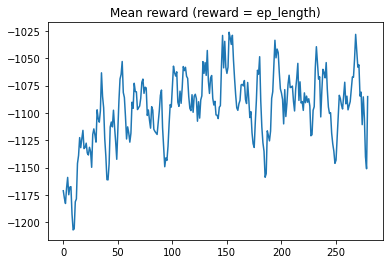

In [9]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
plt.plot(mean_rev)
plt.title('Mean reward (reward = ep_length)')

In [11]:
# Evaluate the trained Trainer (and render each timestep to the shell's
# output).
trainer.evaluate()

{'evaluation': {'episode_reward_max': -759.5413546504926,
  'episode_reward_min': -1839.3662033174048,
  'episode_reward_mean': -1221.5468313226108,
  'episode_len_mean': 200.0,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [-849.0167354480855,
    -1839.3662033174048,
    -1141.1101619854583,
    -1755.2445781421784,
    -1812.5716671310163,
    -1508.787220764532,
    -847.1278328373527,
    -856.238809171426,
    -846.4637497781628,
    -759.5413546504926],
   'episode_lengths': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.12118096788964876,
   'mean_inference_ms': 0.9735172029720612,
   'mean_action_processing_ms': 0.09913692460590705,
   'mean_env_wait_ms': 0.1383591318096057,
   'mean_env_render_ms': 3.9089571323058885},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

## Training an agent with a simple RNN

### Add our custom model to the catalog

In [2]:
ModelCatalog.register_custom_model("LTC", models.LTC)

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a simple RNN as our policy net and PPO as our training algorithm.

In [5]:
rnn_config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "Pendulum-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 4,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "custom_model": "LTC",
        "custom_model_config": 
            {"sample_frequency": 9,
             "state_size": 12,
             "ode_unfolds": 5,
             "epsilon": 1e-8,
             },
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

In [6]:
# Instanciate the PPO trainer object
rnn_trainer = PPOTrainer(config=rnn_config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log_rnn = []
iterations = 140
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log_rnn.append(rnn_trainer.train())
    print('len : ' + str(log_rnn[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log_rnn[i]['hist_stats']['episode_reward']).mean()))

2022-03-31 15:54:28,270	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
(pid=18455) 
(pid=18457) 
(pid=18449) 
(pid=18460) 
2022-03-31 15:54:36,662	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-03-31 15:54:36,664	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
(RolloutWorker pid=18455) 2022-03-31 15:54:36,610	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been d

iteration : 0 , 


(pid=18452) 
(RolloutWorker pid=18452) 2022-03-31 15:54:42,178	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been deprecated. Use `ray.rllib.env.remote_base_env.RemoteBaseEnv` instead. This will raise an error in the future!


len : 200.0
avg_rev : -1182.66755603684
iteration : 1 , 
len : 200.0
avg_rev : -1235.2797878407825
iteration : 2 , 
len : 200.0
avg_rev : -1239.2121082716096
iteration : 3 , 
len : 200.0
avg_rev : -1243.4692895519042
iteration : 4 , 
len : 200.0
avg_rev : -1242.279026036915
iteration : 5 , 
len : 200.0
avg_rev : -1246.9372795408658
iteration : 6 , 
len : 200.0
avg_rev : -1247.7022977747445
iteration : 7 , 
len : 200.0
avg_rev : -1251.0633992385808
iteration : 8 , 
len : 200.0
avg_rev : -1244.7156093401106
iteration : 9 , 
len : 200.0
avg_rev : -1224.6404002158902
iteration : 10 , 
len : 200.0
avg_rev : -1225.6708154626772
iteration : 11 , 


Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

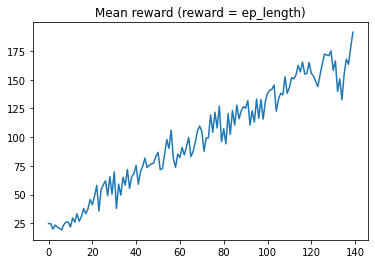

In [ ]:
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev_rnn)
plt.title('Mean reward (reward = ep_length)')

In [7]:
rnn_trainer.evaluate()

NameError: name 'rnn_trainer' is not defined

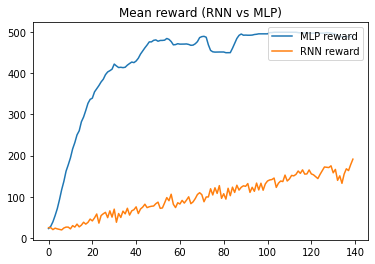

In [32]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev,label='MLP reward')
plt.plot(mean_rev_rnn,label='RNN reward')
plt.title('Mean reward (RNN vs MLP)')
plt.legend(loc="upper right")
plt.show()